# **Caso de uso:** Situación sanitaria en España (2019)
Realizado por Natalia Macho Simancas

Este caso de uso es un ejemplo de aplicación de la técnica de Análisis de Componentes Principales a un conjunto de diferentes variables medidas sobre las 17 Comunidades Autónomas de España. 

## <font color='darkblue'>  **1. ¿Qué es el análisis de componentes principales (PCA)?** </font>

El Análisis de Componentes Principales es una técnica estadística que transforma $p$ variables originales en un menor número de dimensiones. Esto es útil cuando se tiene gran cantidad de información, buscando entre todas las dimensiones (componentes) del dataset, aquellas que son las fundamentales y que definen la estructura básica del mismo.  

Se trata de reemplazar un número elevado de variables correlacionadas entre sí por un número menor de variables que estén incorreladas entre sí (no tengan relación entre ellas). 

La variación (información) del conjunto de datos con las $p$ variables es del 100% y el propósito de aplicar este método es intentar reducir el número de variables agrupando la mayor variación posible, es decir, manteniendo cuanto más porcentaje de información, mejor.

El tipo de datos necesarios para realizar el PCA es un conjunto de variables cuantitativas. En caso de que las variables sean categóricas, en lugar de hablar de Análisis de Componentes Principales, haríamos referencia a un Análisis de correspondencias.

## <font color='darkblue'> **2. Instalar librerías** </font>

Para poder aplicar determinadas funciones, debemos ejecutar el siguiente código instalando algunas librerías de R que vamos a usar en Collaborate.

In [ ]:
install.packages("readxl") #Para poder leer el archivo de datos en formato .xlsx
install.packages("skimr") #Para hacer el análisis descriptivo (EDA) 
install.packages("ggcorrplot") #Para analizar la matriz de correlaciones 
install.packages("ggplot2") #Para visualizar algunos gráficos


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Para realizar gráficos del PCA
system("sudo apt-get install libnlopt-dev")
install.packages("nloptr")
devtools::install_github("sjmgarnier/viridis")
install.packages("dendextend")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




crayon    (1.5.0 -> 1.5.1) [CRAN]
fansi     (1.0.2 -> 1.0.3) [CRAN]
gridExtra (NA    -> 2.3  ) [CRAN]


Installing 3 packages: crayon, fansi, gridExtra

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp50eB8F/remotes3b58a79879/sjmgarnier-viridis-6309bc0/DESCRIPTION’ ... OK
* preparing ‘viridis’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘viridis_0.6.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’




## <font color='darkblue'> **3. Lectura de los datos** </font>
En primer lugar, cargamos los datos que vamos a utilizar. En este caso, se trata de un conjunto de datos compuesto por 17 filas y 38 columnas. Las filas corresponden a las 17 Comunidades Autónomas de España y las 38 columnas a variables que se han medido para cada una de ellas, tanto demográficas como sanitarias.

In [ ]:
library(readxl)
Datos_INE <- read_excel("/content/Datos_INE.xlsx")

head(Datos_INE)

Código,Comunidad Autónoma,T_nat,T_mort,T_mort_inf,Esperanza,Brecha_esp,Esperanza_65,R_masc,Porc_pob,⋯,Tasa_end,Tasa_ment,Tasa_nerv,Tasa_circ,Tasa_resp,Tasa_dig,Tasa_enf,Pob_enf,Pob_limit,Obesidad
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Andalucía,8.21,8.35,3.05,82.22,5.28,20.42,97.49,0.17958062,⋯,48,154,193,1121,826,1096,544.875,48.72,20.12,19.67
2,Aragón,7.28,10.28,2.07,83.90,5.20,21.70,97.49,0.02815692,⋯,74,243,326,1358,1287,1438,748.375,52.96,21.57,15.75
3,"Asturias, Principado de",5.05,12.64,2.52,82.83,5.76,21.17,91.59,0.02182907,⋯,67,314,260,1826,1661,1383,833.750,64.35,29.46,19.12
4,"Baleares, Islas",8.08,6.67,3.20,83.71,4.63,21.60,100.11,0.02453231,⋯,77,297,389,1170,1408,1359,702.500,48.92,19.33,16.35
5,Canarias,6.37,7.10,2.69,82.79,4.95,21.04,98.43,0.04595863,⋯,63,197,160,1035,999,1061,537.500,59.35,27.32,17.50
6,Cantabria,6.10,10.33,1.13,83.60,5.21,21.56,95.13,0.01240164,⋯,81,181,224,1403,1182,1125,652.750,49.28,16.69,13.68


Sin embargo, para este caso sólo nos quedamos con algunas variables de interés que sirvan para ilustrar la técnica:

*   T_nat: Tasa de natalidad
*   T_mort: Tasa de mortalidad
*   Ind_envej: Índice de envejecimiento
*   Médicos: Tasa de médicos por cada 100.000 habitantes
*   Enfermeros: Tasa de enfermeros por cada 100.000 habitantes
*   Inacmedicamen: Inaccesibilidad a los medicamentos recetados por motivos económicos (%)
*   Tasa_enf: Tasa de Morbilidad Hospitalaria por 100.000 habitantes debido a enfermedades, que he construido como una media (equiponderada) de las tasas de morbilidad hospitalaria debido a enfermedades endocrinas, circulatorias, digestivas, respiratorias...

In [ ]:
# Selecciono variables indicando el número de la columna donde se encuentran en el conjunto de datos original
datos <-Datos_INE[,c(3,4,12,16,17,25,36)]
head(datos)

T_nat,T_mort,Ind_envej,Médicos,Enfermeros,Inacmedicam,Tasa_enf
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.21,8.35,101.13,492.50,564.78,0.63,544.875
7.28,10.28,143.52,689.29,681.63,1.23,748.375
5.05,12.64,218.65,653.87,734.98,0.18,833.750
8.08,6.67,99.66,483.97,544.53,0.93,702.500
6.37,7.10,114.07,505.83,653.39,1.77,537.500
6.10,10.33,153.87,635.55,841.39,0.17,652.750


## <font color='darkblue'> **4. Análisis breve de los datos** </font>
Antes de comenzar a aplicar la técnica, comprobamos si hay valores perdidos, por si fuera necesario realizar algún preproceso. En este caso, y como vemos a continuación, no hay ningún NA en los datos que vamos a utilizar.

In [ ]:
# Comprobamos si hay NA's
as.table(apply(is.na(datos), 2, sum))

      T_nat      T_mort   Ind_envej     Médicos  Enfermeros Inacmedicam 
          0           0           0           0           0           0 
   Tasa_enf 
          0 

Por otra parte, para tener una noción general que nos permita describir el conjunto con el que vamos a trabajar, podemos extraer su dimensión, el tipo de variables que contiene o qué valores toma cada una.



In [ ]:
# Dimensión del conjunto de datos
dim(datos)

# Tipo de variables que contiene
str(datos)

# Descripción de las variables
library(skimr)
skim(datos)

[1] 17  7

tibble [17 × 7] (S3: tbl_df/tbl/data.frame)
 $ T_nat      : num [1:17] 8.21 7.28 5.05 8.08 6.37 6.1 5.96 7.51 8.09 7.47 ...
 $ T_mort     : num [1:17] 8.35 10.28 12.64 6.67 7.1 ...
 $ Ind_envej  : num [1:17] 101.1 143.5 218.7 99.7 114.1 ...
 $ Médicos    : num [1:17] 492 689 654 484 506 ...
 $ Enfermeros : num [1:17] 565 682 735 545 653 ...
 $ Inacmedicam: num [1:17] 0.63 1.23 0.18 0.93 1.77 0.17 1.22 0.23 0.89 1.92 ...
 $ Tasa_enf   : num [1:17] 545 748 834 702 538 ...
── Data Summary ────────────────────────
                           Values
Name                       datos 
Number of rows             17    
Number of columns          7     
_______________________          
Column type frequency:           
  numeric                  7     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean      sd     p0    p25    p50
1 T_nat             

Observamos que la dimensión del conjunto es 17 x 7, dada por las 17 Comunidades Autónomas en las filas y las 7 variables definidas anteriormente en las columnas.

Además, vemos que estas variables son todas de tipo numérico, y además, podemos obtener información como la media, desviación típica, los cuartiles y el histograma de cada una.

### <font color='steelblue'> **4.1. Correlación entre variables** </font>

Otro aspecto de interés es calcular si existe correlación entre las variables que vamos a utilizar. El que existan correlaciones muy elevadas en el conjunto de datos nos permitirá resumir la información en un menor número de componentes principales, pues éstas explicarán una mayor cantidad de información.


Loading required package: ggplot2



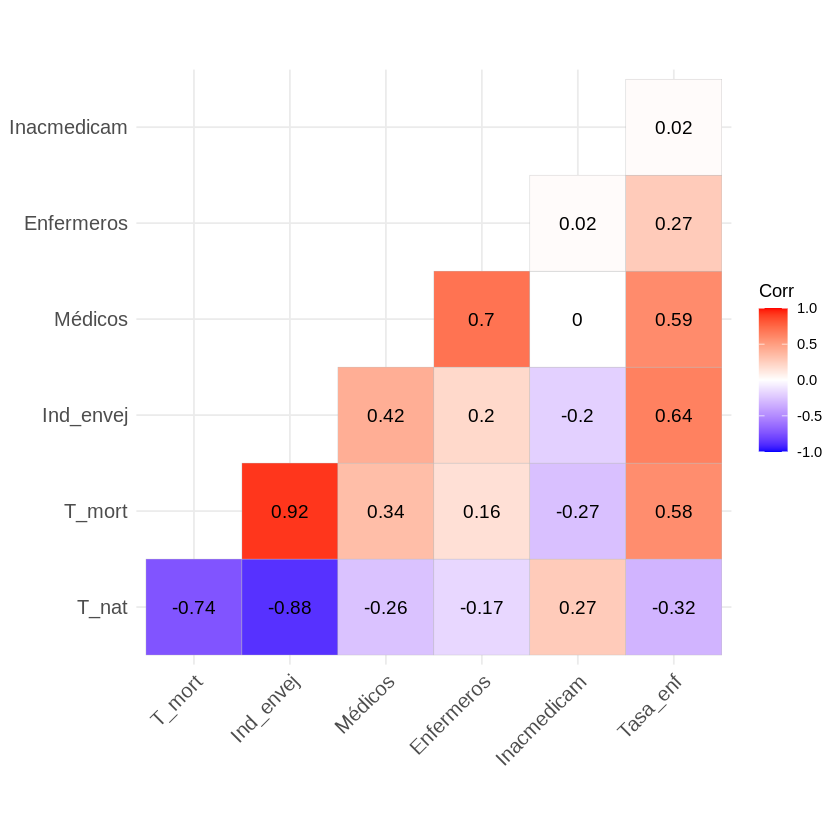

In [ ]:
library(ggcorrplot)
ggcorrplot(cor(datos), type = "lower", lab = T, show.legend = T)


En este caso, se ha generado un gráfico entre variables, sin tener en cuenta la correlación de la variable consigo misma, pues siempre será del 100%. 

En términos absolutos, vemos que hay varias correlaciones moderadas/altas como entre las variables T_mort y Ind_envej (del 92%) o entre T_nat y T_mort (del 74%). En el primer caso, la correlación es positiva, es decir las Comunidades con mayor Tasa de mortalidad serán también aquellas con mayor Índice de envejecimiento, y en el segundo caso, la correlación es negativa, por lo que a mayor tasa de natalidad en una comunidad, menor tasa de mortalidad.

Las correlaciones más bajas corresponden a los pares Inacmedicam y Tasa_enf (2%) o Enfermeros y Inacmedicam (2%), llegando incluso a haber un par de variables incorreladas: Médicos e Inacmedicam.



## <font color='darkblue'> **5. Análisis de componentes principales (PCA)** </font>

Antes de aplicar la técnica de PCA, calculamos la media y varianza de cada variable.


In [ ]:
# Calculamos la media para todas las variables a la vez
as.table(apply(X = datos, MARGIN = 2, FUN = mean))

      T_nat      T_mort   Ind_envej     Médicos  Enfermeros Inacmedicam 
   7.293529    9.385294  136.597647  574.071176  688.022353    1.115294 
   Tasa_enf 
 705.852941 

Podemos extraer información como que la tasa media de médicos por cada 100.000 habitantes es inferior a la de enfermeros, o que el porcentaje medio de población con inaccesibilidad a los medicamentos es del 1'1%.

In [ ]:
# Calculamos la varianza (también podíamos haber aplicado "sd" para calcular la desviación típica)
as.table(apply(X = datos, MARGIN = 2, FUN = sd))

      T_nat      T_mort   Ind_envej     Médicos  Enfermeros Inacmedicam 
  1.1357483   1.7603910  37.5359432  77.1117121 140.7285645   0.6241306 
   Tasa_enf 
 86.0081327 

Observamos que la variable con mayor dispersión, es decir, la que más varía de una Comunidad Autónoma a otra es la tasa de Enfermeros, seguida por la tasa de incidencia media de las enfermedades y la de Médicos.

Como el PCA es sensible a la magnitud de los datos, antes de aplicar la técnica, debemos prepararlos de forma que todas las variables tengan la misma importancia en el análisis.

### <font color='steelblue'> **5.1.   Preparación de los datos y aplicación de la técnica** </font>

Para aplicar PCA, los datos deben estar centrados y estandarizados, y como hemos visto, las variables de estudio tienen unidades de medida (escalas) bastante dispares, por lo que antes de realizar el estudio de los componentes principales, tenemos que estandarizar las variables para que tengan media 0 y varianza 1. 

Teóricamente, esto es equivalente a realizar el estudio a partir de la matriz de correlaciones, en lugar de a partir de la matriz de covarianzas.

Si no estandarizásemos las variables, las variables Médicos y Enfermeros dominarían las componentes principales.


In [ ]:
pca <- prcomp(datos, scale=TRUE)  # Scale=T -> utilizamos la matriz de correlaciones

### <font color='steelblue'> **5.2. Accedemos a la información de cada componente** </font>

Una vez creado el modelo que he llamado "pca", podemos acceder a la información que nos interesa. 

In [ ]:
# Vemos todos los elementos que podemos extraer
names(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [ ]:
# En primer lugar, accedemos a dos de ellos
as.table(pca$center) #son las medias originales (antes del PCA)

      T_nat      T_mort   Ind_envej     Médicos  Enfermeros Inacmedicam 
   7.293529    9.385294  136.597647  574.071176  688.022353    1.115294 
   Tasa_enf 
 705.852941 

In [ ]:
as.table(pca$scale) #desv tipica originales

      T_nat      T_mort   Ind_envej     Médicos  Enfermeros Inacmedicam 
  1.1357483   1.7603910  37.5359432  77.1117121 140.7285645   0.6241306 
   Tasa_enf 
 86.0081327 

##### **a) Calculamos los coeficientes de la ecuación para cada componente principal**

En primer lugar, extraemos los vectores que definen cada componente principal, que no son más que los coeficientes de las variables en cada eje, dando lugar a ecuaciones de cada eje como combinación lineal del total de variables.

Las componentes principales se corresponden con los **autovectores** (eigenvectors) de la matriz de correlaciones, y son extraídas de la siguiente forma:

In [ ]:
# Autovectores / eigenvector
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
T_nat,-0.4270118,0.3083847,-0.008988199,0.50247373,-0.348115698,-0.40168978,-0.43296643
T_mort,0.4701640,-0.2430823,-0.113411927,0.01113627,-0.455987748,-0.62648091,0.32629331
Ind_envej,0.5036940,-0.1972515,-0.163033713,-0.10631657,0.049561195,0.02085919,-0.81646163
Médicos,0.3435595,0.5298832,0.176924105,0.13246428,0.623322284,-0.40041787,0.05896305
Enfermeros,0.2330590,0.5761666,0.404540649,-0.37517212,-0.510098955,0.21521711,-0.05281068
Inacmedicam,-0.1295046,0.3910394,-0.811238715,-0.40406462,-0.004102112,-0.08658092,0.03777880
Tasa_enf,0.3921454,0.2030906,-0.327739876,0.64383523,-0.140306382,0.48123047,0.17824227


Analizar el vector que crea cada componente y cuáles son los pesos que tienen las variables en cada componente, ayuda a interpretar qué tipo de información recoge cada una de ellas. 

Por ejemplo, la primera componente principal (PC1), presenta la siguiente ecuación, como combinación lineal de las siete variables originales:

$$PC_1 = -0.42 T_{nat} + 0.47 T_{mort} + 0.5Ind_{envej} + 0.34 Medicos + 0.23 Enfermeros - 0.12 Inac_{medicam} + 0.39 Tasa_{enf}$$

El análisis e interpretación de las componentes se explica en el apartado 5.4.

##### **b) Extraemos las nuevas coordenadas de los individuos (puntuaciones)**
Además, podemos ver las puntuaciones, que son las coordenadas de cada observación original (Comunidad Autónoma) sobre los nuevos ejes construidos (componentes principales).

In [ ]:
nombres <- c("Andalucía","Aragón","Asturias, Principado de","Baleares, Islas","Canarias", "Cantabria",
      "Castilla y León","Castilla-La Mancha", "Cataluña", "Comunidad Valenciana", "Extremadura", "Galicia", 
      "Madrid, Comunidad de", "Murcia, Región de", "Navarra, Comunidad Foral de", "País Vasco", "Rioja, La")

rownames(pca$x)<- nombres

pca$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Andalucía,-2.29780864,-1.17108641,0.91626309,-0.20305801,-0.006424862,-0.573688653,-0.14890360
Aragón,1.00976268,0.77424874,-0.15274606,0.43908296,0.665940100,-0.695838881,0.20598823
"Asturias, Principado de",4.02433299,-1.03317546,0.49808668,0.37042340,0.225286205,0.183607951,-0.07438375
"Baleares, Islas",-2.13246462,-0.54804063,-0.03645048,0.75801563,0.211985810,0.922992167,-0.03286732
Canarias,-1.83025928,-0.41486990,-0.21320240,-2.06824011,0.689522809,0.396000896,0.07004163
Cantabria,1.41475192,-0.21256737,1.88652836,-0.65976823,0.177812778,-0.155155518,0.07658536
Castilla y León,2.70411492,-0.18487892,-0.62652953,-0.18199384,-0.038962514,-0.146942499,-0.11730269
Castilla-La Mancha,-1.32760977,-1.94021471,1.06434279,-0.04561078,-0.632263777,-0.112965899,0.02533346
Cataluña,-0.33553404,0.70136546,0.27442715,1.02159787,-0.328778916,0.570291134,0.12593594
Comunidad Valenciana,-1.04717225,-0.08800225,-1.28286604,-0.35378816,0.100452783,0.005465301,0.14143116


Por ejemplo, en un gráfico bidimensional con los dos primeros ejes, Andalucía toma la posición (-2.29, -1.17), o por otro lado, el País Vasco se encuentra en (1.12, 1.06).

Dando una interpretación a cada eje, podremos determinar qué perfil tiene cada CC.AA. dentro del estudio.

##### **c) Varianza explicada por cada componente principal**
Una vez calculadas las componentes principales, es de interés conocer la varianza explicada por cada una, ya que el principal objetivo que se sigue con PCA es maximizar la cantidad de información explicada por las componentes.



In [ ]:
summary(pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.882 1.2322 0.9619 0.77556 0.47878 0.41008 0.12381
Proportion of Variance 0.506 0.2169 0.1322 0.08593 0.03275 0.02402 0.00219
Cumulative Proportion  0.506 0.7229 0.8551 0.94104 0.97379 0.99781 1.00000

<ins>**Standard deviation**</ins>: muestra las desviaciones estándar de cada componente principal, que también se pueden calcular como:



In [ ]:
pca$sdev # desv. tipica de cada componente 

[1] 1.8820667 1.2322050 0.9619112 0.7755650 0.4787778 0.4100778 0.1238131

Si elevamos al cuadrado estas desviaciones, tenemos la varianza (el autovalor correspondiente). Es decir, la varianza explicada por cada componente corresponde con los **autovalores** de la matriz de covarianzas de los datos estandarizados.

In [ ]:
pca$sdev^2 # varianza de cada componente

[1] 3.54217490 1.51832920 0.92527315 0.60150104 0.22922822 0.16816380 0.01532969

<ins>**Proportion of Variance**</ins>: es la proporción de la varianza total que explica cada componente principal y quizá, es la fila más importante de nuestros resultados. Como los autovalores están ordenados de mayor a menor y así son construidas las componentes principales, la primera componente principal es la que mayor porcentaje de variabilidad explica, un 50%. Así, la varianza explicada por la componentes van en orden decreciente, teniendo que la segunda componente explica un 21% y la tercera, un 13%.

<ins>**Cumulative proportion**</ins>: es la varianza acumulada y se calcula progresivamente sumando la *Proportion of Variance* anterior. En vista de estos resultados, vemos que la primera componente agrupa el 50% de la variación, y que necesitamos 3 componentes para alcanzar el 85%.

### <font color='steelblue'> **5.3. Elección del número de componentes** </font>

Graficando el valor de la varianza de cada componente principal, podemos observar los resultados comentados anteriormente, que las primeras componentes son las que más varianza explican y que a medida que se añaden más, la varianza explicada por cada una es menor.

Esto podemos hacerlo a partir de sus autovalores correspondientes...

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



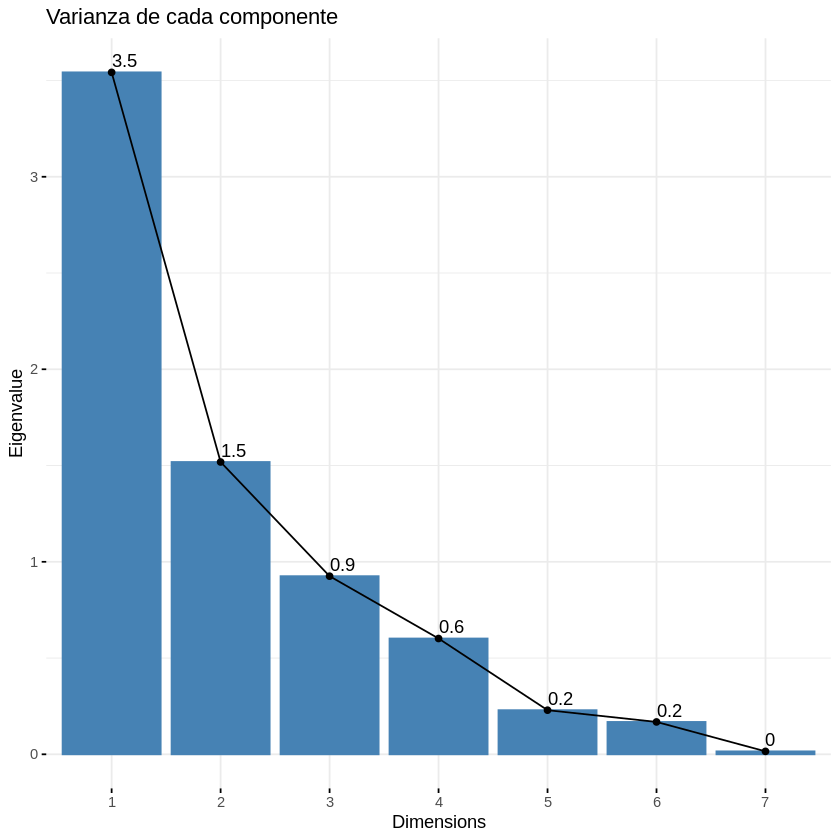

In [ ]:
library (factoextra)
fviz_eig(pca, main="Varianza de cada componente", choice = "eigenvalue", addlabels = T)

... o como el porcentaje de varianza explicada por cada componente sobre el total. 

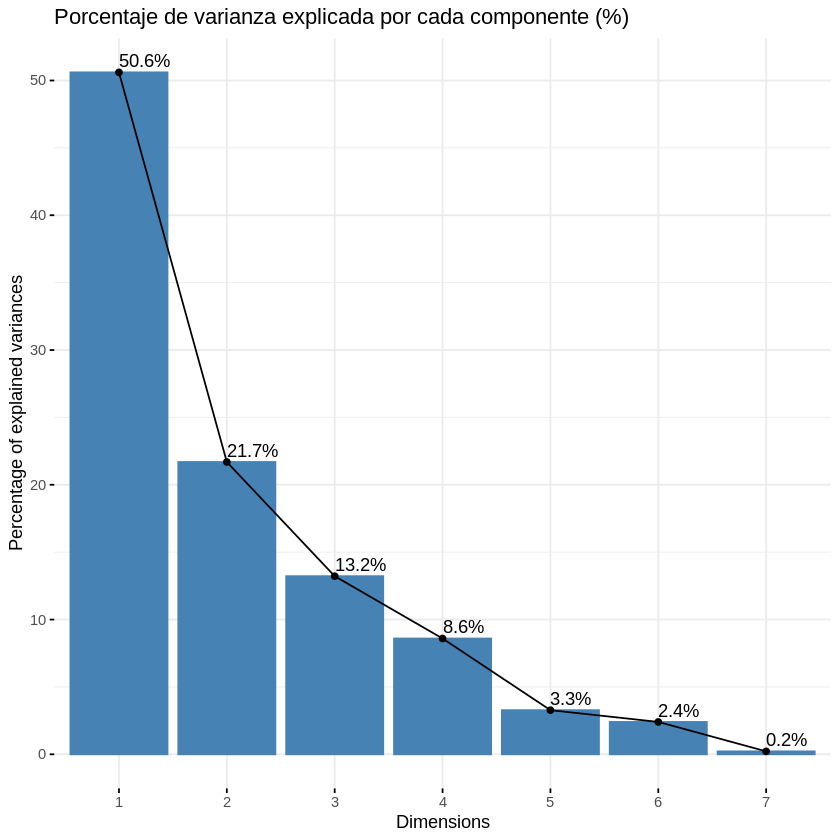

In [ ]:
fviz_screeplot(pca, addlabels = TRUE, main="Porcentaje de varianza explicada por cada componente (%)")

A continuación, representamos las varianzas acumuladas:

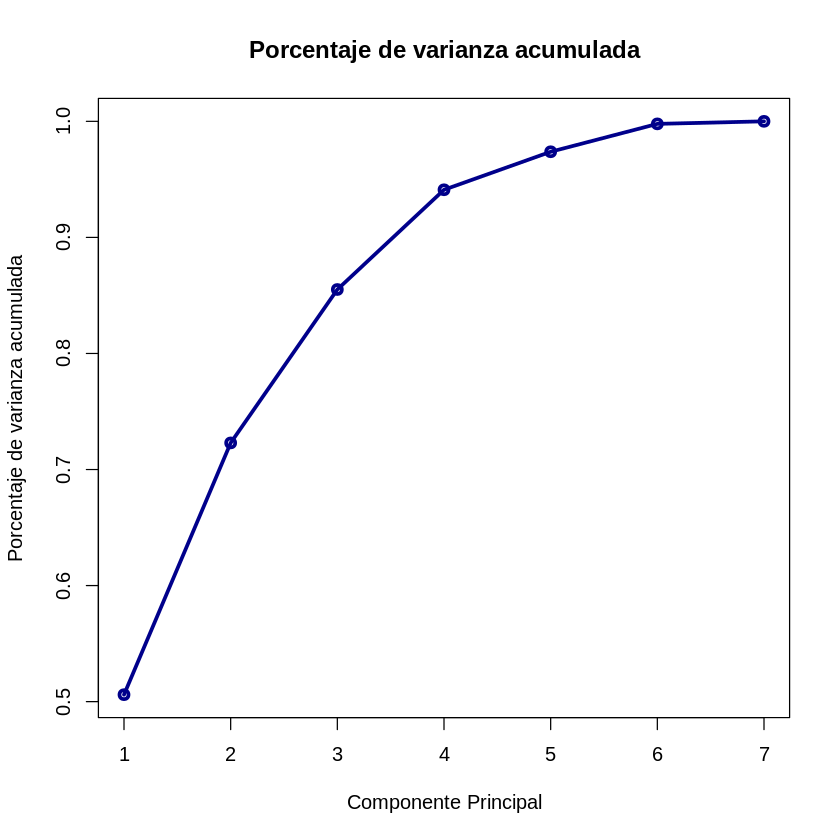

In [ ]:
plot(summary(pca)$importance[3, ], type="o", col="darkblue", lwd=3, main = "Porcentaje de varianza acumulada", xlab = "Componente Principal", ylab = "Porcentaje de varianza acumulada")

Determinar el número de componentes que elegir para continuar con el análisis no tiene unas normas determinadas a seguir. Respecto a ello, existen varios criterios con sus respectivas propuestas. 

1.  Una opción para determinar el número de componentes principales que seleccionar, es coger aquellas tal que expliquemos un **% determinado de la variabilidad de los datos que nosotros prefijemos**. Por ejemplo, si ponemos como umbral un 80%, necesitaríamos elegir 3 componentes, o si nos conformamos con explicar un 65%, 2 componentes serían suficientes.

2.  Otra posibilidad es seguir el **criterio de Kaisser**, que escoge aquellas componentes cuyo autovalor sea superior a 1 (cuando las variables han sido generadas a partir de la matriz de correlaciones). Según este criterio, eligiríamos las dos primeras componentes. Este criterio, cuando p < 20, tiende a ser estricto e incluir pocas componentes.

3.  Para relajar el criterio de Kaisser, existe la **modificación de Jollife**, que elige aquellas componentes cuyo autovalor sea superior a 0.7. Esta modificación, nos permite elegir 3 componentes.

En este caso, nos podríamos quedar con las 3 primeras componentes principales, ya que es el número en el que coincide el mayor número de criterios.

Por tanto, en lugar de trabajar con las 7 variables originales, trabajaremos con 3 variables nuevas, que son combinaciones de ellas.

### <font color='steelblue'> **5.4. Interpretación de las componentes principales seleccionadas** </font>

Hemos decidido quedarnos con 3 componentes principales, que explican el 85.51% de la variabilidad total. Para realizar su interpretación, volvemos a ver los coeficientes de las ecuaciones de los componentes, observando cuáles son los valores más altos (en valor absoluto), para así poder dar una interpretación a cada eje.

In [ ]:
# Autovectores de las primeras 3 componentes
pca$rotation [,1:3]

,PC1,PC2,PC3
T_nat,-0.4270118,0.3083847,-0.008988199
T_mort,0.4701640,-0.2430823,-0.113411927
Ind_envej,0.5036940,-0.1972515,-0.163033713
Médicos,0.3435595,0.5298832,0.176924105
Enfermeros,0.2330590,0.5761666,0.404540649
Inacmedicam,-0.1295046,0.3910394,-0.811238715
Tasa_enf,0.3921454,0.2030906,-0.327739876


Gráficamente, también podemos ver la contribución de las variables a los 3 primeros ejes, señalando en color azul las variables que puntúan positivamente en el eje, y en rojo, las que lo hacen de forma negativa.

corrplot 0.92 loaded



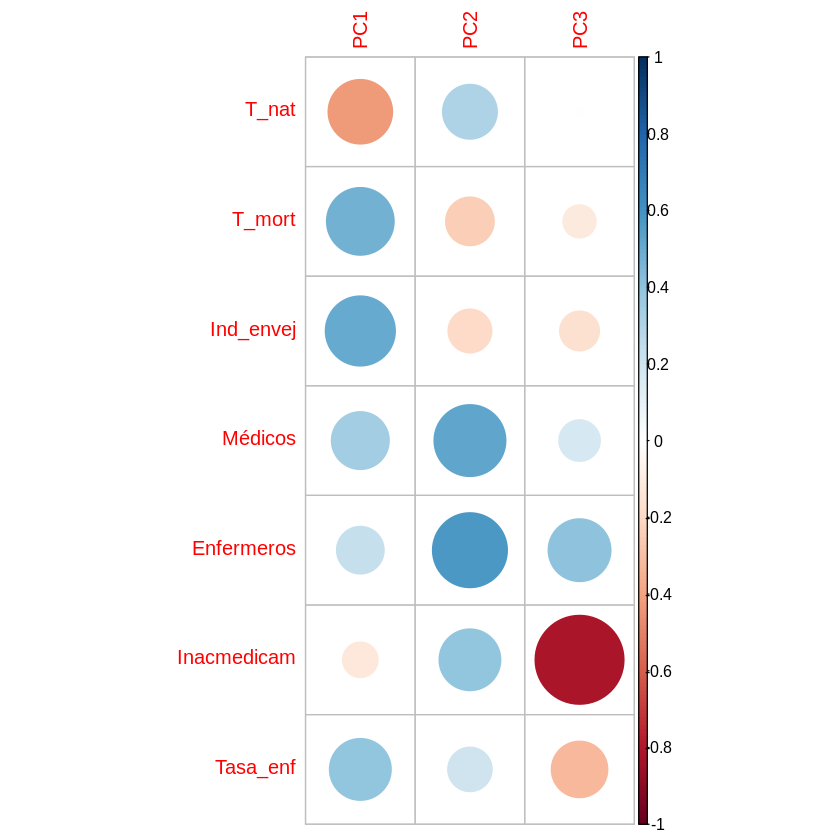

In [ ]:
library("corrplot")
corrplot(pca$rotation[,1:3])

Si nos fijamos en los pesos más altos, podemos darle una interpretación a cada eje. Por ejemplo:

*  La **primera componente** explica un 50% de la variación. Hay valores absolutos bastante similares y elevados, que son los correspondientes con las variables Ind_envej, T_mort, T_nat y Tasa_enf. Por lo tanto, parece que la primera componente recoge <ins>información demográfica</ins>. Teniendo en cuenta los signos podemos concluir que las CC.AA. que se sitúen a la derecha del eje serán aquellas con mayor Tasa de mortalidad, mayor Índice de envejecimiento, mayor Tasa de incidencia de enfermedades en la población, y en contraposición, menor Tasa de natalidad. 

*  En la **segunda componente**, los pesos más elevados corresponden con las variables Médicos y Enfermeros, representando de alguna forma, los <ins>recursos sanitarios de las CCAA</ins>. Ambas variables contribuyen de forma positiva al eje, por lo que cuanto más a la derecha del eje se sitúe una CC.AA., mayores recursos de personal sanitario posee.

*  Para la **tercera componente**, el peso más elevado y con gran diferencia sobre el resto, corresponde a la variable medidora de la <ins>inaccesibilidad de la población a los medicamentos recetados</ins>. La variable puntúa negativamente en el eje, de forma que las Comunidades con mayor valor en esta componente, son aquellas con menor inaccesibilidad a los medicamentos.

### <font color='steelblue'> **5.5. Representación gráfica** </font>

##### **a) Gráfico de las variables**
Representamos sobre las dos primeras componentes principales las variables originales. En el eje de abscisas se representa la PC1 y en el eje de ordenadas, la PC2.

Para interpretar correctamente las variables tenemos que fijarnos en la longitud de la flecha y en el ángulo que forman respecto a los ejes y entre ellos mismos.

-  Ángulo vector - eje: cuanto más paralelo es un vector al eje, más ha contribuido a dicha componente principal. 

-  Ángulo entre dos vectores: si es pequeño representa una alta correlación entre las variables implicadas (y por tanto, observaciones con valores altos en una variable, tendrá valores altos en la otra). Si el ángulo es cercano a 90º indica que las variables están incorreladas y los ángulos opuestos indican correlación negativa entre ellas.

-  Longitud: cuanto mayor es la longitud de un vector, mayor varianza de la variable está contenida en el biplot, es decir, mejor representada está en el gráfico.


En el gráfico, diferenciamos por colores las variables según su calidad de representación en las dos primeras componentes. Cuanto más cerca esté una variable del círculo de correlaciones, mejor será su representación, por lo que las variables que estén muy cerca del centro de la gráfica son las menos importantes para las dos primeras componentes.

Observamos que todas las variables poseen una tonalidad cálida, indicando una buena calidad representativa en la PC1 y PC2. Sin embargo, *Inacmedicam* tiene un color azul, y es debido a que es la única variable recogida con un mayor peso en la PC3, por lo que no la tenemos en cuenta a la hora de interpretar este gráfico.


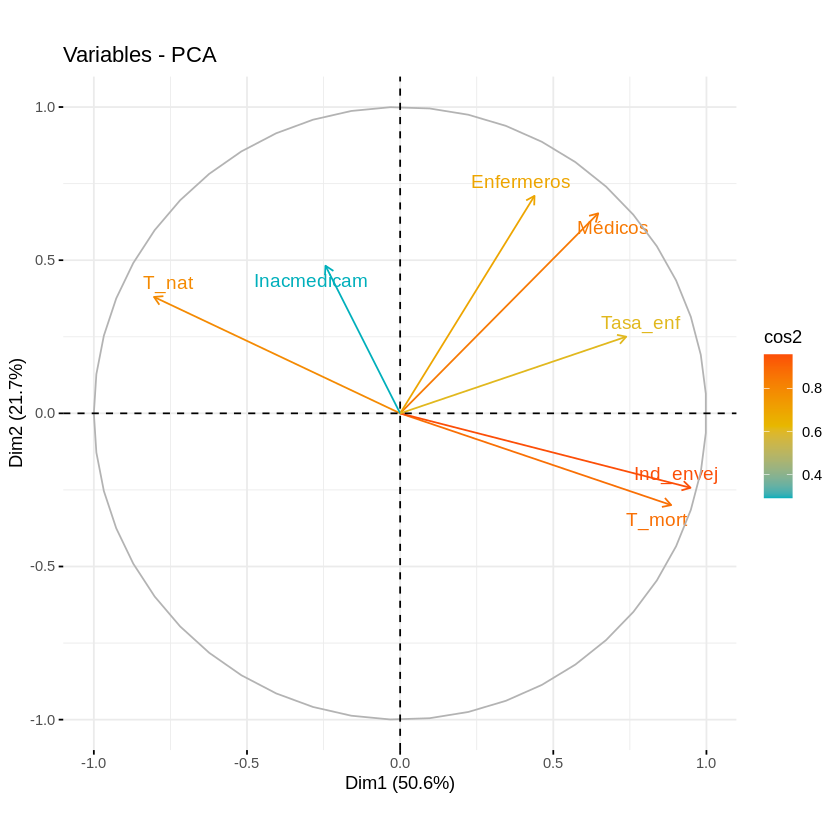

In [ ]:
fviz_pca_var(pca, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

En este gráfico, observamos de forma visual las conclusiones ya extraídas previamente de forma numérica. 

*  Si nos fijamos en el eje de abscisas, vemos como T_mort, Ind_envej, Tasa_enf y T_nat son las variables con menor ángulo respecto a él, indicando que han contribuído a la formación de la PC1. Las tres primeras variables se sitúan a la derecha del eje (contribución positiva), mientras que T_nat lo hace a la izquierda (contribución negativa). Es llamativo el pequeño ángulo formado por T_mort e Ind_envej, y es debido a la alta correlación entre ambas, que recordamos que era del 92%).

*  En cuanto al eje de ordenadas, vemos que las variables que forman un menor ángulo respecto a él, son Médicos y Enfermeros, siendo las que más contribuían a la formación de la PC2, ambas de forma positiva.



Además, podemos calcular la **correlación de las variables con cada componente principal**, que indican las coordenadas de la variable en el gráfico anterior. 

Por tanto, las coordenadas de las variables pueden ir de -1 a 1. Cuanto más cercanas a -1 o 1, la variable afecta considerablemente al componente. Cuando están cercanas a 0 indican que la variable tiene poca influencia en el componente.


In [ ]:
corr_var <- pca$rotation %*% diag(pca$sdev)
colnames(corr_var) <- c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7")

corr_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
T_nat,-0.8036646,0.3799932,-0.008645849,0.389701029,-0.16667008,-0.164724058,-0.053606935
T_mort,0.8848801,-0.2995273,-0.109092202,0.008636899,-0.21831683,-0.256905909,0.040399401
Ind_envej,0.9479857,-0.2430543,-0.156823954,-0.082455405,0.02372880,0.008553891,-0.101088682
Médicos,0.6466018,0.6529247,0.170185277,0.102734659,0.29843290,-0.164202476,0.007300401
Enfermeros,0.4386326,0.7099553,0.389132179,-0.290970356,-0.24422408,0.088255756,-0.006538656
Inacmedicam,-0.2437362,0.4818407,-0.780339601,-0.313378367,-0.00196400,-0.035504914,0.004677512
Tasa_enf,0.7380438,0.2502493,-0.315256656,0.499336059,-0.06717559,0.197341931,0.022068736


Estas correlaciones entre variables - componentes, podemos observarlas de forma gráfica.

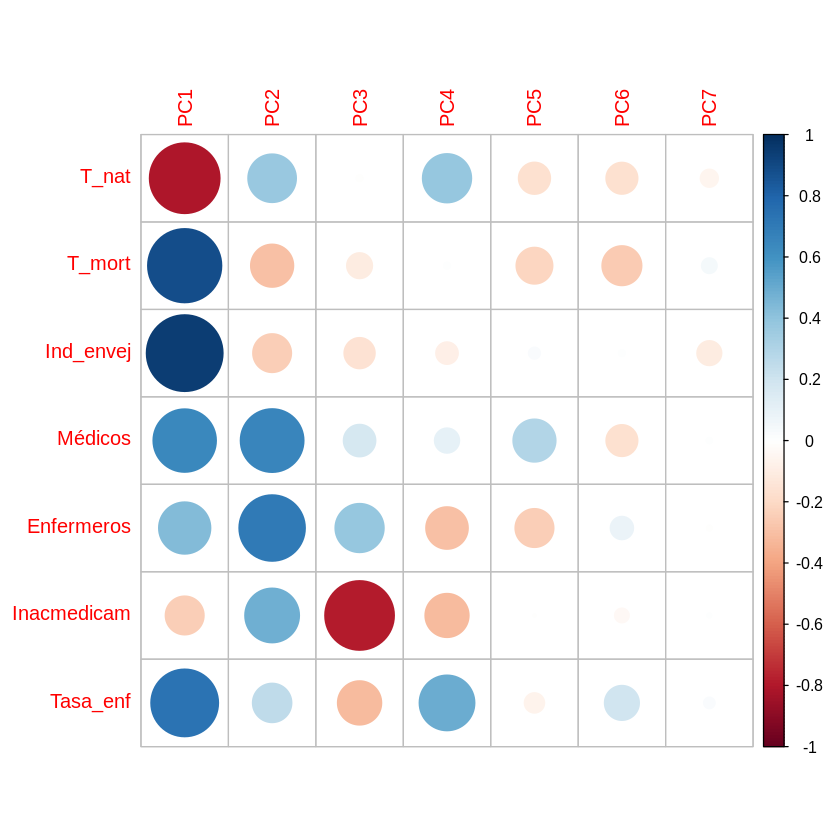

In [ ]:
corrplot(corr_var)

En cuanto a este gráfico, es llamativo como las tres primeras componentes son las más importantes en el PCA, sobre todo, la PC1.

##### **b) Gráfico de los individuos**
Tras observar la representación de las variables, en este apartado vemos la representación de los individuos sobre los nuevos ejes, con la idea de que aquellos con características similares, se agrupan cerca al tener puntuaciones parecidas. Las comunidades con valores cercanos a la media se situarán cerca del centro del gráfico (0,0).

Representando los individuos sobre PC1 y PC2, vemos que Comunidades como Canarias y Baleares, o Aragón y el País Vasco están muy próximas entre sí, indicando que tienden a tener un nivel sanitario similar.

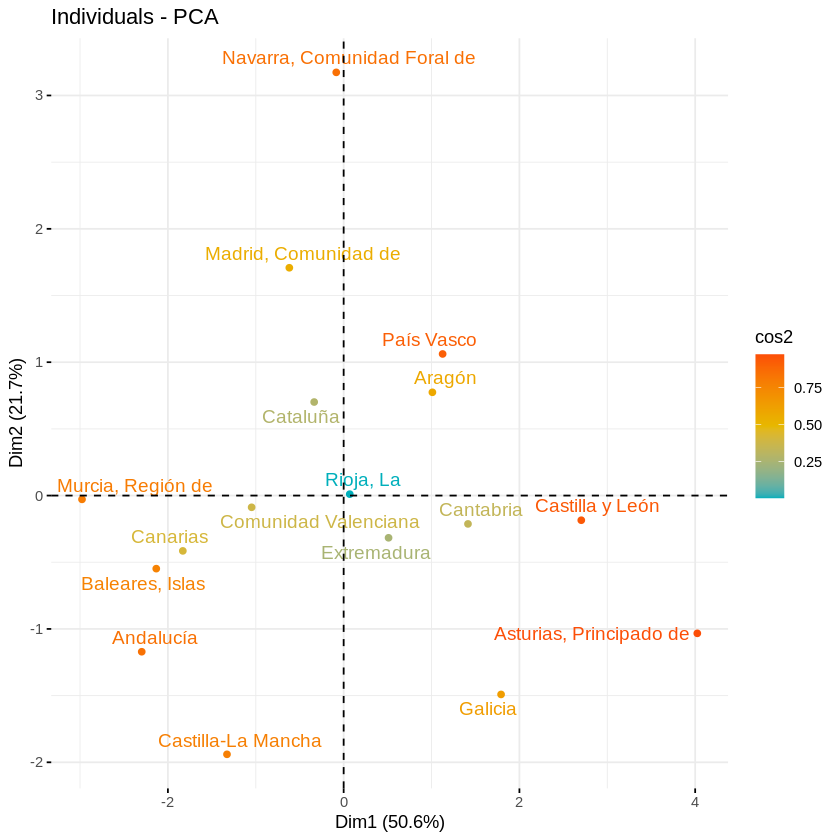

In [ ]:
# Sobre PC1 y PC2
fviz_pca_ind(pca, col.ind = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE, axes = c(1, 2))

Del mismo modo, podemos representar las Comunidades sobre PC1 y PC3.

En este caso, las CC.AA. con menor porcentaje de población con inaccesibilidad a los medicamentos son Cantabria, Madrid y Castilla-La Macha, mientras que las Comunidades en las que un mayor porcentaje de población sufre estos problemas son Galicia, la Comunidad Valenciana o Murcia.

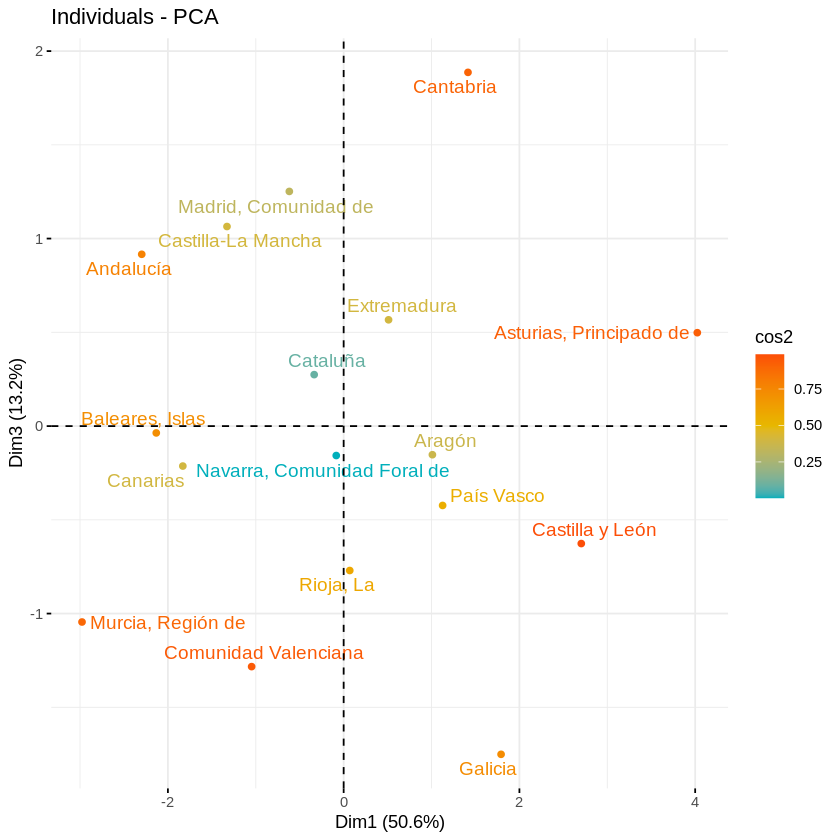

In [ ]:
# Sobre PC1 y PC3
fviz_pca_ind(pca, col.ind = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE, axes = c(1, 3))

Para poder extraer fácilmente los perfiles, podemos combinar las variables e individuos en un solo gráfico que nos permita identificar qué Comunidades se encuentran en una situación parecida y además, que nos permita identificar sus características.

##### **c) Biplot**
El biplot permite la representación conjunta de los individuos y las variables sobre los nuevos ejes. Para que el resultado sea fácilmente interpretable, debemos tener pocas variables e individuos en el conjunto de datos.

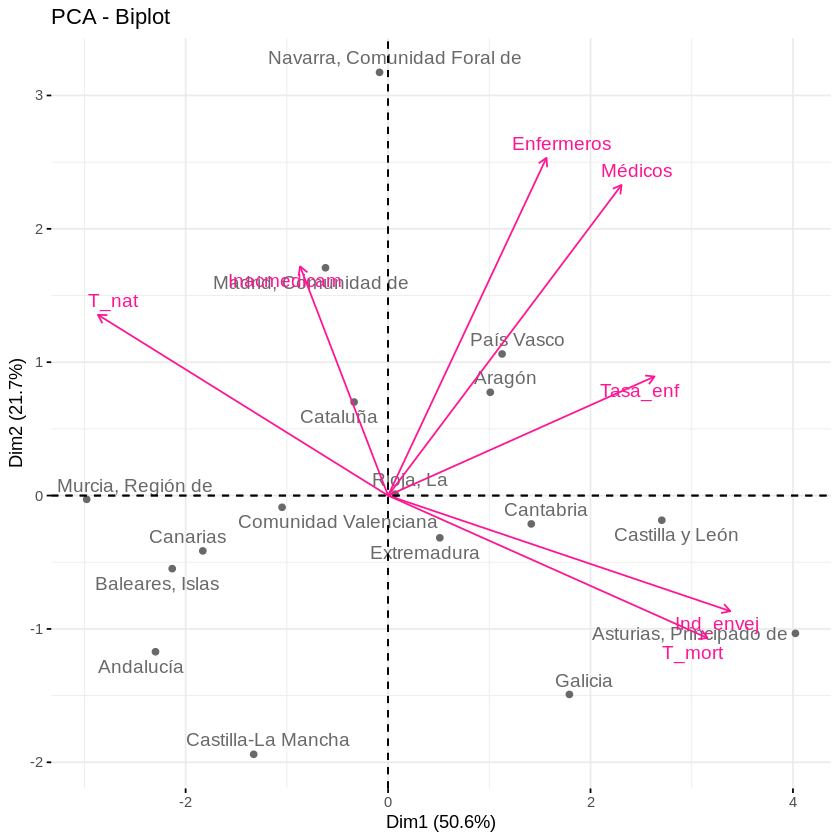

In [ ]:
fviz_pca_biplot(pca, repel = TRUE, col.var = "deeppink", col.ind = "#696969")

Los ejes inferior e izquierdo representan las puntuaciones o scores de cada observación sobre las componentes principales. Por ejemplo, las coordenadas de Andalucía son (-2.29, -1.17) o las de Madrid, (-0.61, 1.7).

Sobre ellos, se han superpuesto a escala, las variables tenidas en cuenta en el análisis.


<ins> **Perfiles** <ins/>
*  Respecto a los extremos del eje PC1, observamos dos grupos diferenciados. Por una parte, (Murcia, Canarias Baleares y Andalucía) son las CC.AA. con mayor tasa de natalidad; mientras que (Asturias, Galicia, Castilla y León) son las que tienen una población más envejecida y con mayor tasa de morbilidad por enfermedades.
*  Respecto al eje PC2, se tiene que Navarra es la Comunidad con mayor personal sanitario, seguida por Madrid. Entre las Comunidades con menores recursos sanitarios se encuentran Castilla-La Mancha, Galicia y Andalucía.

También se puede destacar que La Rioja se encuentra justo en el origen de coordenadas (0,0), pudiendo considerarse representante de la media española en cuanto a las características demográficas y sanitarias.

## <font color='darkblue'> **6. Conclusiones del estudio** </font>

El objetivo de este estudio era, partiendo de un conjunto de datos demográfico-sanitarios sobre la población española, extraer en qué situación se encuentra cada Comunidad y así identificar cuáles son las Comunidades con un perfil más parecido entre sí.

Tras haber aplicado la técnica de PCA, hemos concluido que:
-  Las CC.AA. del noroeste de España como Galicia, Asturias, Castilla y León y Cantabria se caracterizan por tener su población envejecida y con mayor tasa de incidencia de enfermedades. Además, coincide con tener una baja tasa de personal sanitario. 
-  En contraposición, Aragón o el País Vasco tienen también una población envejecida pero cuentan con una mayor tasa de personal sanitario por habitante.
-  Murcia, Andalucía, Baleares y Canarias se caracterizan por ser las Comunidades con mayor tasa de natalidad de España.
-  La situación demográfica de Madrid y Cataluña es mejor que la media española, mayor tasa de natalidad, menor mortalidad, además de que cuentan con una mayor tasa de personal sanitario.
-  En los extremos, Castilla La-Mancha es la Comunidad con menor personal sanitario entre su población, mientras que Navarra es la que concentra un mayor número de médicos y enfermeros entre ella.
-  La situación de la Rioja puede considerarse como la representantiva de la media española. También la Comunidad Valenciana y Extremadura se encuentran cercana a ella, aunque con una tasa algo menor de personal sanitario. Y mientras que la primera cuenta con una población más joven, Extremadura tiene algo más de envejecimiento en su población.


